# **`Bike Sharing Assignment`**

## Problem Statement

A US bike-sharing provider  **BoomBikes**  has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

  
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

## Business Goal
  

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 

Further, the model will be a good way for management to understand the demand dynamics of a new market

## Steps/Phases per the CRISP-DM

CRISP-DM(Cross-Industry Standard Process for Data Mining) framework is a process model with six phases that naturally describes the data science life cycle. The phases mentioned are as below:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Modelling
5. Model Evaluation
6. Model Deployment (not in scope for this assignment)

### 1. Business Understanding


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

  
A US bike-sharing provider  **BoomBikes**  has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

  
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

  
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

-   Which variables are significant in predicting the demand for shared bikes.
-   How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

#### Business Goal/Expectations of Solution
  

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 

Further, the model will be a good way for management to understand the demand dynamics of a new market

### 2. Data Understanding

The dataset for the given problem statement is provided and we will be having a quick view of same next.

#### Importing required libraries

In [1]:
## Numpy and Pandas to contain and perform operations on data
import numpy as np # for mathematical operations
import pandas as pd # for reading and manipulation of data

## Matplotlib and Seaborn to visualize the data once we have cleaned up data
import matplotlib.pyplot as plt # for plotting charts and graphs
import seaborn as sns # for better charts and graphs (advanced graph library that uses matplotlib)

## Ignore the warnings
import warnings 
#warnings.filterwarnings("ignore")
warnings.simplefilter('always')

# Statsmodels for statistical analysis and building linear regression models
import statsmodels.api as sm # 

# scikit-learn libraries for statistical analysis and building linear regression models
from sklearn.model_selection import train_test_split # for spliting the dataset into train set and test set
from sklearn.preprocessing import MinMaxScaler # for rescalimg of variables
from sklearn.feature_selection import RFE # for using the Recursive Feature Selection method for feature selection
from sklearn.linear_model import LinearRegression # for using LinearRegression class to run RFE method
from sklearn.metrics import mean_squared_error # for checking the mean squared error
from sklearn.metrics import r2_score # for checking the r-squared
from statsmodels.stats.outliers_influence import variance_inflation_factor # for computing the VIF of the variables

In [2]:
bikesharing_df = pd.read_csv('day.csv')
bikesharing_df.sample(15) 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
496,497,12-05-2019,2,1,5,0,6,0,1,23.130847,27.24085,48.0417,8.249911,2622,4807,7429
684,685,16-11-2019,4,1,11,0,5,1,1,14.145000,17.36020,52.4583,11.458675,484,5214,5698
118,119,29-04-2018,2,0,4,0,5,1,1,20.910000,24.87315,45.7083,16.084221,878,3717,4595
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
691,692,23-11-2019,4,1,11,0,5,1,1,15.101653,18.93895,56.8750,9.917407,1603,2307,3910
435,436,12-03-2019,1,1,3,0,1,1,1,19.133347,22.97960,48.9167,13.916771,838,4460,5298
497,498,13-05-2019,2,1,5,0,0,0,1,25.112500,29.26190,57.6250,15.082839,2172,3946,6118
475,476,21-04-2019,2,1,4,0,6,0,1,23.370000,27.14605,68.2917,19.000329,2541,4083,6624
240,241,29-08-2018,3,0,8,0,1,1,1,26.103347,30.39790,55.4583,10.708275,729,3905,4634
173,174,23-06-2018,3,0,6,0,4,1,2,29.861653,34.69165,70.3333,15.999868,746,4044,4790


In [3]:
bikesharing_df.shape

(730, 16)

In [4]:
print("We have " + '\033[1m' + str(bikesharing_df.shape[0]) + ' rows\033[1m and ' + str(bikesharing_df.shape[1]) + ' columns')

We have 730 rows and 16 columns


#### Data Dictionary

The above data coupled with Data Dictionary will help us understand the fields and data better. Following data dictionary was provided.

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
    - 1: Clear, Few clouds, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [5]:
bikesharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We can observe that variables are split like this:
##### Categroical
- season
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit	

##### Numerical
- temp
- atemp
- hum
- windspeed
- casual
- registered
- cnt

While **instant** is just more of an index variable and **dteday** is date variable

In [6]:
# forming arrays for columns to allow easy access

# Categorical variables
cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

# Numerical variables
num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']

In [7]:
bikesharing_df[num_vars].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


We can clearly observe that there are **no missing values** across all the columns and no outliers visible by inferring above staistical data.

We will do quick data glance to understand if the columns do have any linear patterns with count.

#### Visualizing numerical variables 

Making pairplot of all the numeric variables

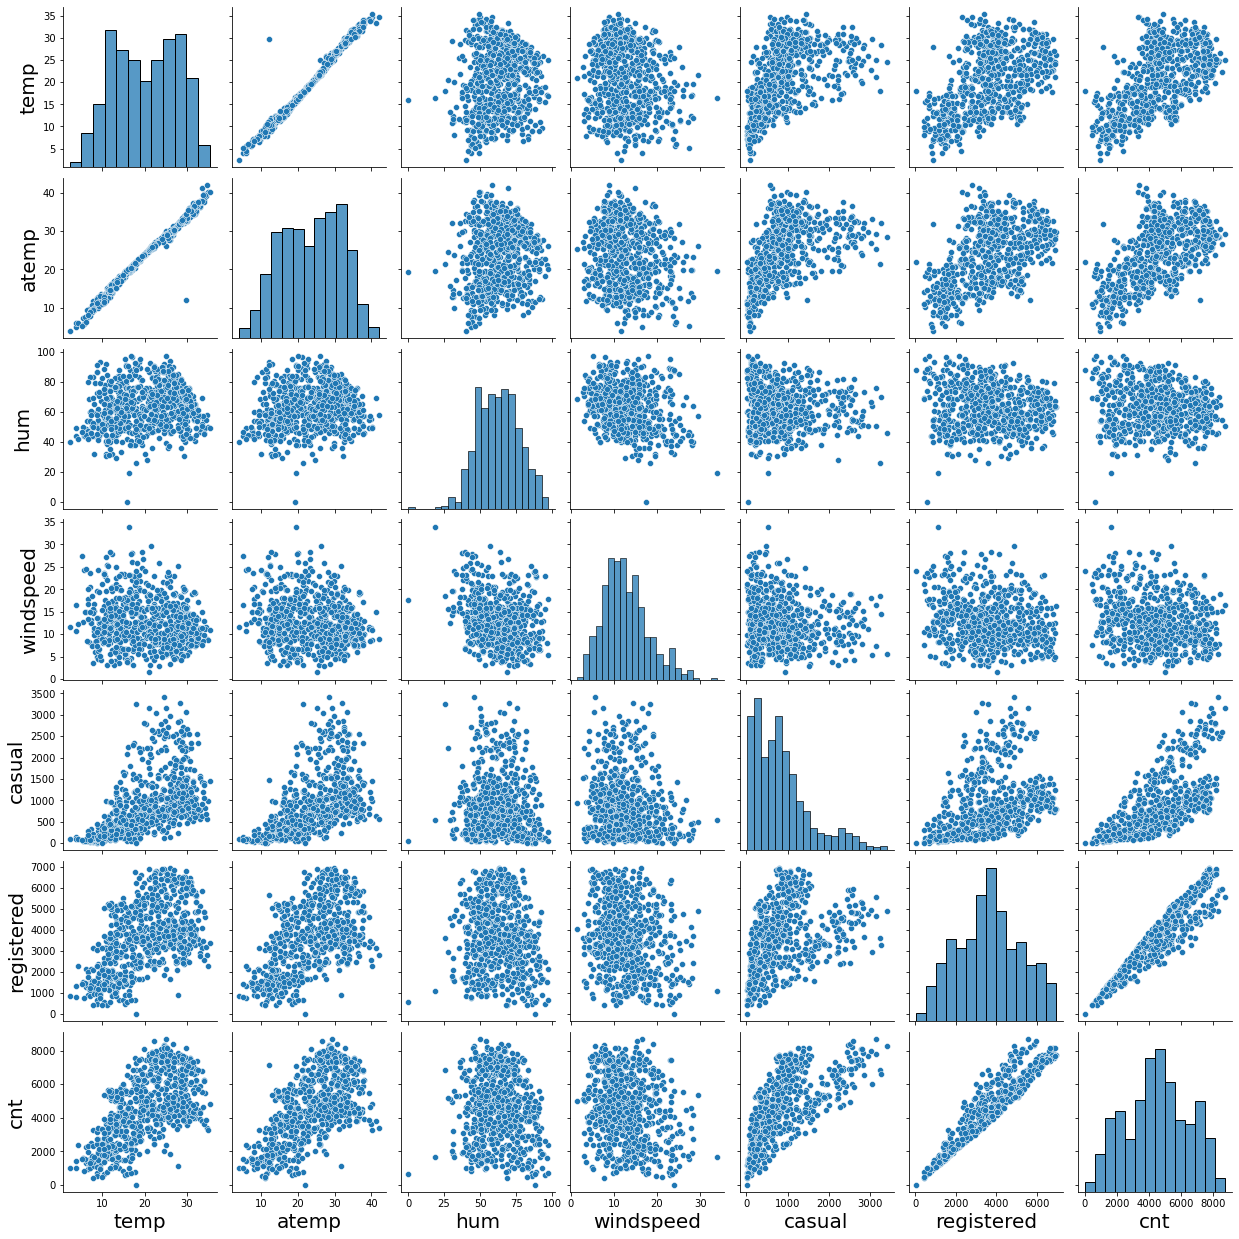

In [8]:
with sns.plotting_context(rc={"axes.labelsize":20}):
    sns.pairplot(bikesharing_df[num_vars])
plt.show()

Reffering last row it can be observed that **Temp** seems to have quite linear pattern with **cnt** while **windspeed** and **hum** have linear but quite varaible pattern

#### Visualizing categorical variables 

Making pairplot of all the categorical variables

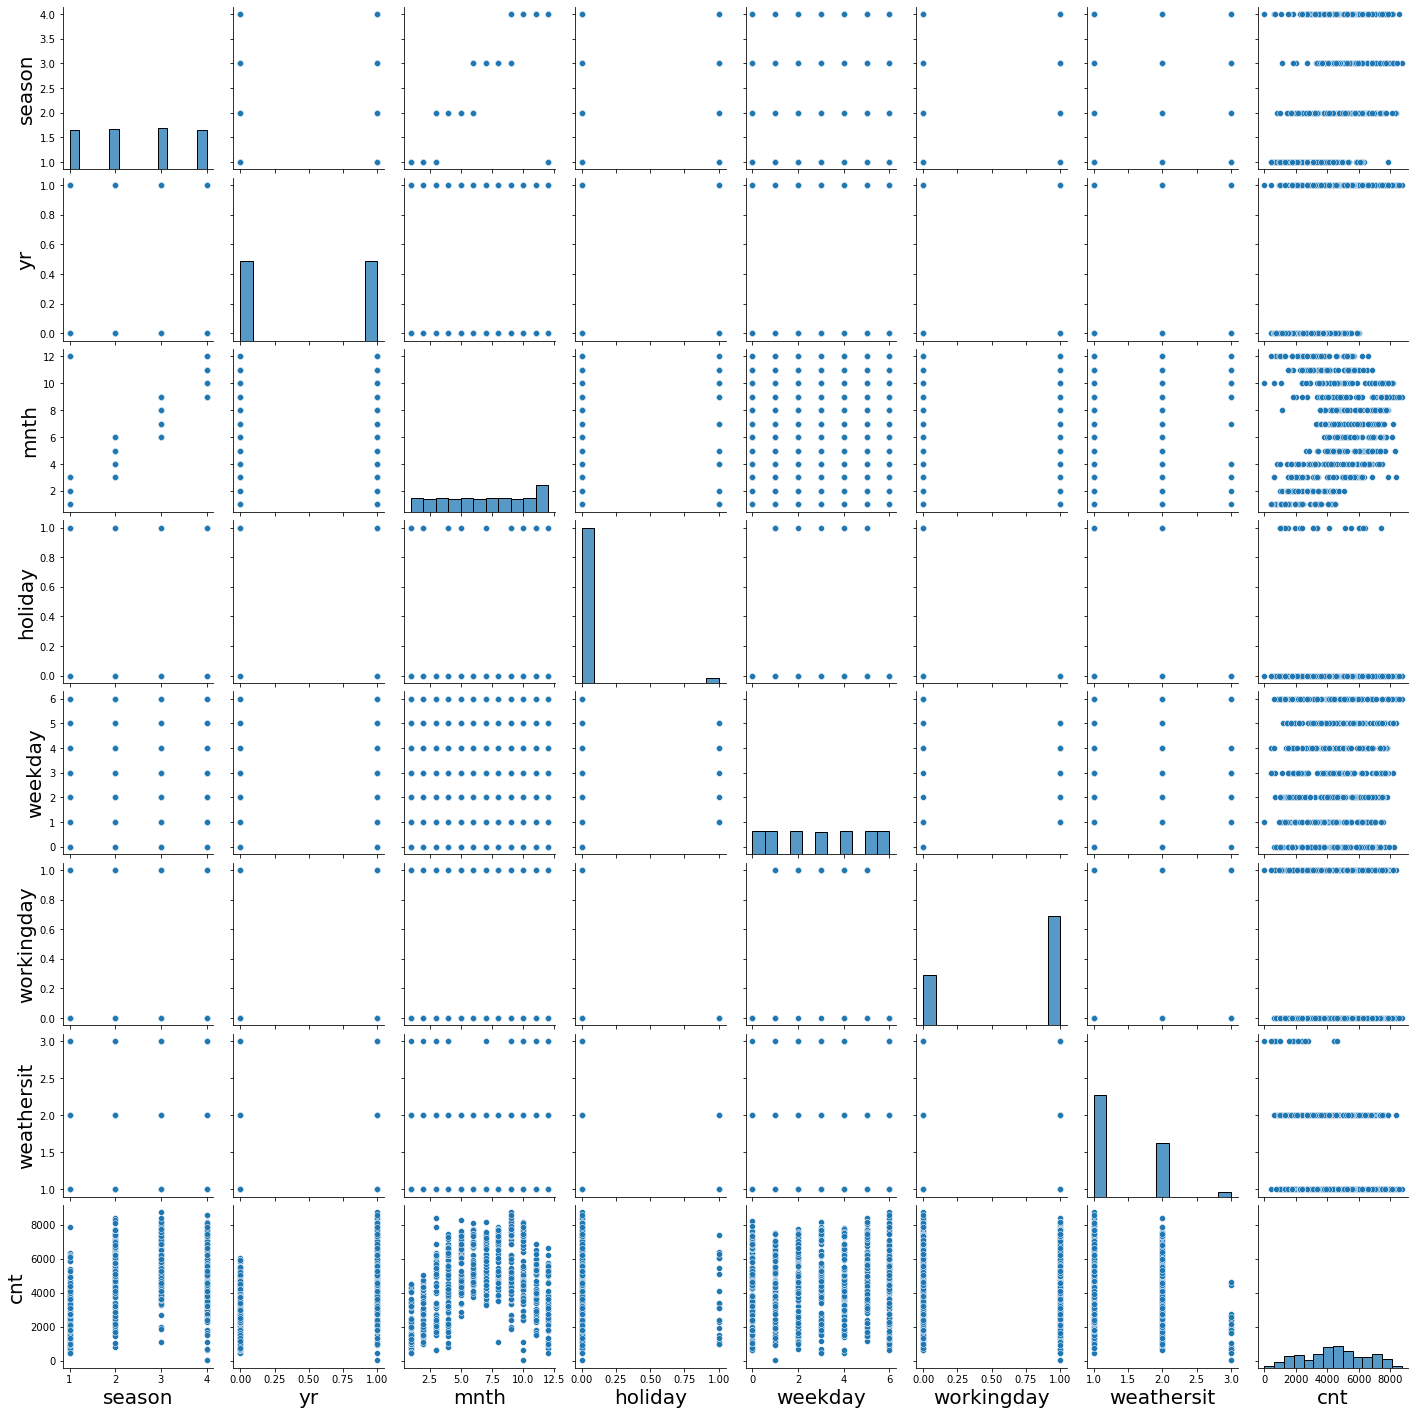

In [9]:
with sns.plotting_context(rc={"axes.labelsize":20}):
    sns.pairplot(bikesharing_df[cat_vars + ["cnt"]])
plt.show()

We can observe a higher count pattern in certain month idicated by **mnth** field and count dropping in bad weather

We will now plot boxplot for categorical variables to observe variations and patterns

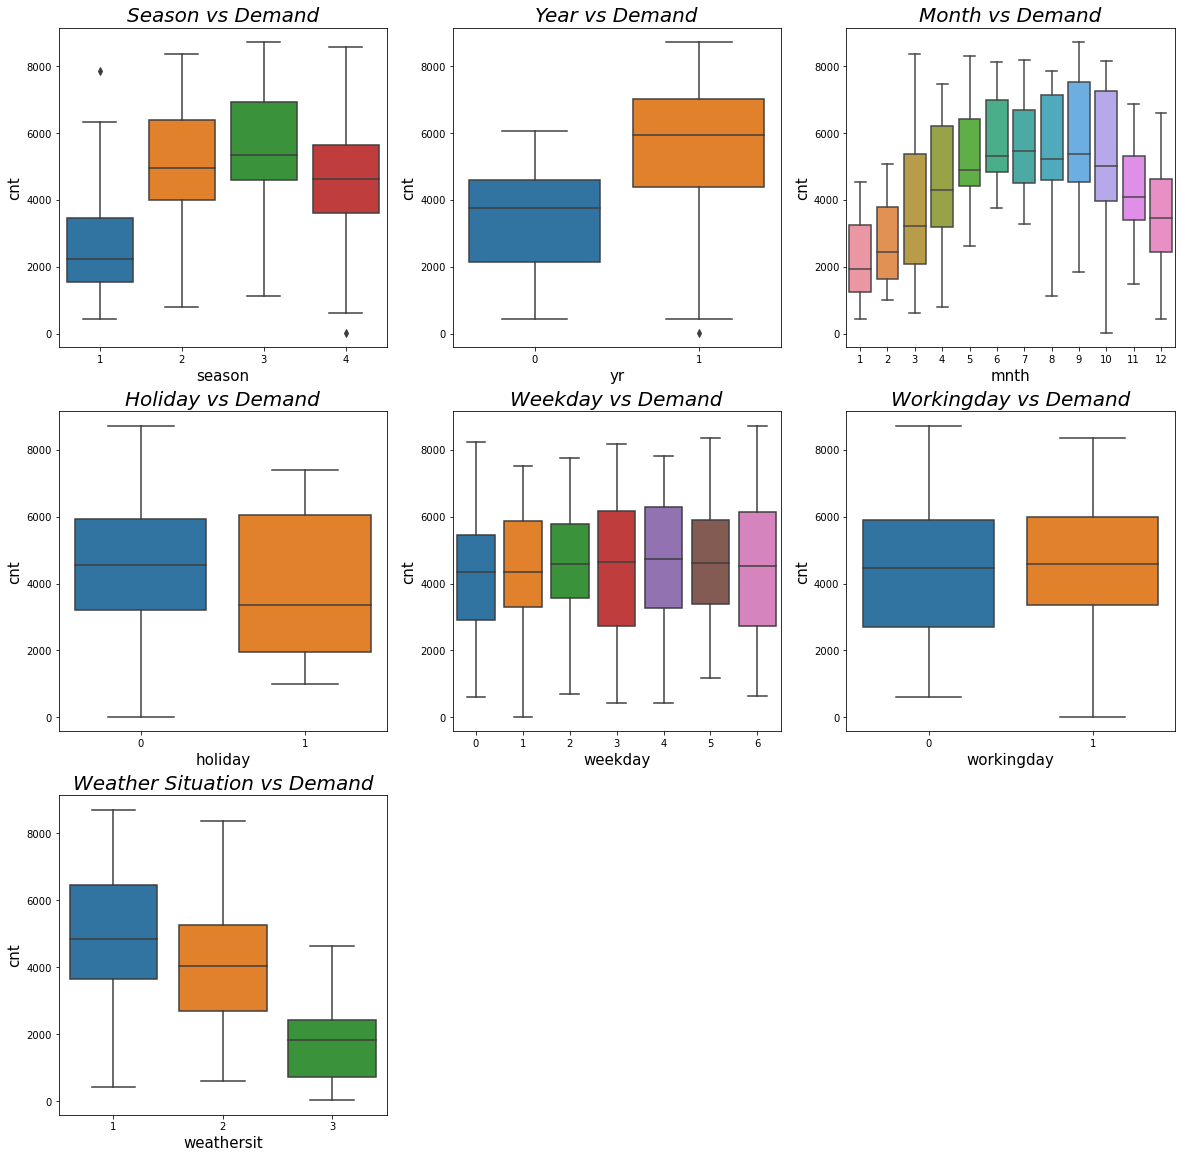

In [10]:
plt.figure(figsize=(20, 20))
plt.rcParams["axes.labelsize"] = 15
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing_df).set_title('Season vs Demand',fontsize=20,fontstyle='italic')
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing_df).set_title('Year vs Demand',fontsize=20,fontstyle='italic')
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing_df).set_title('Month vs Demand',fontsize=20,fontstyle='italic')
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing_df).set_title('Holiday vs Demand',fontsize=20,fontstyle='italic')
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing_df).set_title('Weekday vs Demand',fontsize=20,fontstyle='italic')
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing_df).set_title('Workingday vs Demand',fontsize=20,fontstyle='italic')
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing_df).set_title('Weather Situation vs Demand',fontsize=20,fontstyle='italic')
plt.show()

We can observe:

1. Overall count increased over year, means, demand/usage is growing year over year.
2. **Fall** season is having a maximum demand.
3. And definitely a **Clear** sky do boost demand.

### 3. Data Preparation

We will now clean and structure data so we can use it for further analysis and model building.

Creating a **checkpoint dataframe** here

#### Data Quality Checks  and Cleaning

We will be cleaning up any nulls columns or duplicates rows 
We will also drop irrelevant/redundant columns.

In [11]:
# having this functions to print row and columns count

def printColumnCount(dataframe):
    print("Now we are left with " + '\033[1m' + str(dataframe.shape[1]) + ' columns\033[0m')
    
def printRowCount(dataframe):
    print("Now we are left with " + '\033[1m' + str(dataframe.shape[0]) + ' rows\033[0m')

##### Checking and dropping Duplicates

In [12]:
# drop any duplicate rows
bikesharing_clean_df = bikesharing_df.drop_duplicates()
printColumnCount(bikesharing_clean_df)
printRowCount(bikesharing_clean_df)

Now we are left with 16 columns
Now we are left with 730 rows


So no duplicates were found

Now moving on to drop unwanted columns

As highlighted above **instant** is index column hence redundant and so is **dteday** out of which we already have year and other things captured in remaining columns

##### Check for null columns

In [13]:
bikesharing_clean_df.isnull().sum().sort_values(ascending=False)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are **no null columns**

##### Check for null rows

In [14]:
bikesharing_clean_df.isnull().sum(axis=1).sort_values(ascending=False)

0      0
479    0
481    0
482    0
483    0
      ..
245    0
246    0
247    0
248    0
729    0
Length: 730, dtype: int64

There are **no null rows**

##### Dropping Irrelevant/Redundant  columns

In [15]:
bikesharing_clean_df.drop(['instant','dteday'],axis=1,inplace=True)
printColumnCount(bikesharing_clean_df)
printRowCount(bikesharing_clean_df)

Now we are left with 14 columns
Now we are left with 730 rows


The columns **casual** and **registered** are directly related to our target variable **cnt** as the sum of these two gives us the **cnt** value. 

As our target variable is **cnt** and keeping **casual** & **registered** can lead to data leakage in our model. 

Hence dropping these columns.

In [16]:
bikesharing_clean_df.drop(['casual','registered'],axis=1,inplace=True)
printColumnCount(bikesharing_clean_df)
printRowCount(bikesharing_clean_df)

Now we are left with 12 columns
Now we are left with 730 rows


In [17]:
num_vars.remove('casual')
num_vars.remove('registered')
num_vars

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

##### Outliers treatment

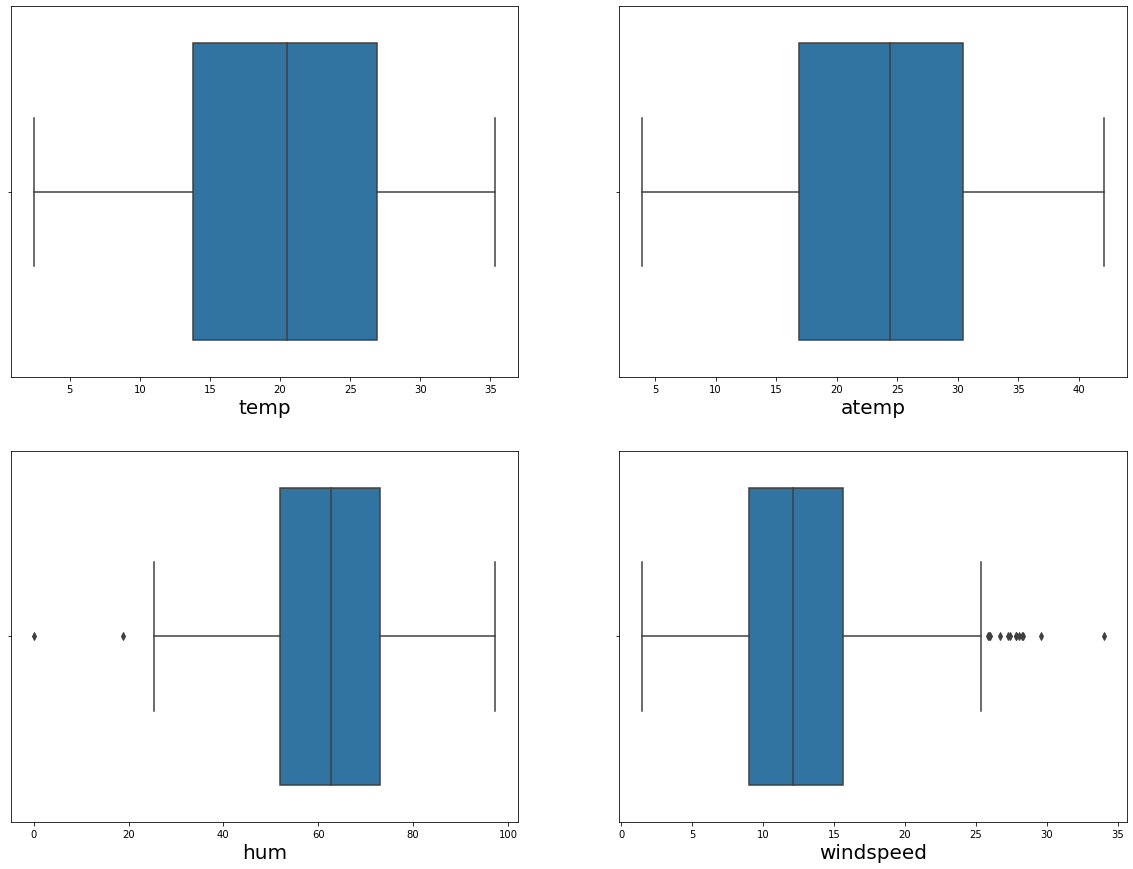

In [18]:
plt.figure(figsize=(20, 15))
plt.rcParams["axes.labelsize"] = 20
plt.subplot(2,2,1)
sns.boxplot(x = 'temp', data = bikesharing_clean_df)
plt.subplot(2,2,2)
sns.boxplot(x = 'atemp', data = bikesharing_clean_df)
plt.subplot(2,2,3)
sns.boxplot(x = 'hum', data = bikesharing_clean_df)
plt.subplot(2,2,4)
sns.boxplot(x = 'windspeed', data = bikesharing_clean_df)
plt.show()

In [19]:
bikesharing_clean_df[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


We are not seeing any significant outliers when cross referenced with statistical metrics of these columns

After cleaning we are now left with following catergorical and numerical columns

In [20]:
print("Numerical variables including target variable", num_vars)
print("Categorical variable", cat_vars)

Numerical variables including target variable ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
Categorical variable ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


#### Catgorical variable handling

To better understand the implication we can subsitiute the meaning of catgorical variables in **checkpoint dataframe** so we can easily interpret the model implications later rather than co-relating data dictionary again and again 

In [21]:
bikesharing_clean_subst_df = bikesharing_clean_df

# using data dictionary
# switching the non-ordinal values of 'season' variable with its associated categorical string values
bikesharing_clean_subst_df.season.replace({1:'spring', 
                                           2:'summer', 
                                           3:'fall', 
                                           4:'winter'}, inplace=True)
                                                                
# switching the non-ordinal values of 'mnth' variable with its associated categorical string values
bikesharing_clean_subst_df.mnth.replace({1:'january',
                 2:'february',
                 3:'march',
                 4:'april',
                 5:'may',
                 6:'june',
                 7:'july',
                 8:'august',
                 9:'september',
                10:'october',
                11:'november',
                12:'december'}, inplace=True)
                                                                 
# based on gerogian calender
# switching the non-ordinal values of 'weekday' variable with its associated categorical string values
bikesharing_clean_subst_df.weekday.replace({6:'monday',
                    0:'tuesday',
                    1:'wednesday',
                    2:'thursday',
                    3:'friday',
                    4:'saturday',
                    5:'sunday'}, inplace = True)
                                                                
# switching the non-ordinal values of 'weathersit' variable with its associated categorical string values
bikesharing_clean_subst_df.weathersit.replace({1:'Clear_Few_Clouds',
                       2:'Mist_Cloudy',
                       3:'Light_Snow_Light_Rain',
                       4:'Heavy_Rain_Ice_Pallets_Thunderstorm_Mist'}, inplace = True)

                                                                 
bikesharing_clean_subst_df.sample(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
12,spring,0,january,0,saturday,1,Clear_Few_Clouds,6.765000,7.54415,47.0417,20.167000,1406
199,fall,0,july,0,thursday,1,Clear_Few_Clouds,31.843347,37.37395,65.0417,8.750200,4541
69,spring,0,march,0,sunday,1,Mist_Cloudy,12.977402,15.25000,64.9565,15.608990,1977
303,winter,0,october,0,wednesday,1,Clear_Few_Clouds,13.940000,17.80315,70.3333,7.125450,3669
195,fall,0,july,0,sunday,1,Clear_Few_Clouds,27.196653,31.21855,59.1250,12.249811,5538
471,summer,1,april,0,thursday,1,Clear_Few_Clouds,24.941653,29.92435,39.0417,18.333143,6691
672,winter,1,november,0,tuesday,0,Clear_Few_Clouds,13.359153,16.47690,53.2917,12.000236,5107
211,fall,0,july,0,tuesday,0,Clear_Few_Clouds,33.039153,36.48980,48.0833,11.042471,4302
643,winter,1,october,0,monday,0,Clear_Few_Clouds,22.720847,26.92605,66.4167,17.957675,7965
512,summer,1,may,1,wednesday,0,Clear_Few_Clouds,29.212500,33.96500,67.6250,13.166907,6043


We are not touching **year(yr)** as its an ordinal categorical variable i.e. 0 and 1 are in order 2018 and 2019 so that impart model the knowledge how progressing year the pattern changes


#### Dummy Variables

The since we have non-oridnal categorical variables which are beyond binary categories hence we will be encoding them.

Since they are non-ordinal hence label encoding (with which we got data) was not going to be helpful since data is increasing number is not signifying any increase in importance of that category hence we swapped the labels back(just for ease of reading) and now going for **one-hot encoding**


In [22]:
months_dummy=pd.get_dummies(bikesharing_clean_subst_df.mnth,drop_first=True)
weekdays_dummy=pd.get_dummies(bikesharing_clean_subst_df.weekday,drop_first=True)
weathersit_dummy=pd.get_dummies(bikesharing_clean_subst_df.weathersit,drop_first=True)
seasons_dummy=pd.get_dummies(bikesharing_clean_subst_df.season,drop_first=True)

In [23]:
bikesharing_clean_subst_df = pd.concat([bikesharing_clean_subst_df,months_dummy,weekdays_dummy,weathersit_dummy,seasons_dummy],axis=1)
bikesharing_clean_subst_df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bikesharing_clean_subst_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,Light_Snow_Light_Rain,Mist_Cloudy,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
# renaming holiday and workingday for ease of Understanding 
bikesharing_clean_subst_df.rename(columns={"holiday": "holiday_yes", "workingday": "workingday_yes"}, inplace=True)
bikesharing_clean_subst_df.head()

,yr,holiday_yes,workingday_yes,temp,atemp,hum,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,Light_Snow_Light_Rain,Mist_Cloudy,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


Now we have successfully converted all our data categorical data to numerical one and we will perform the final steps of data preparation i.e. test-train split and scaling numerical variables.


#### Test-train split

We are spliting data into sets of training and test data and will also serve as **checkpoint**

In [25]:
bikesharing_train_df, bikesharing_test_df = train_test_split(bikesharing_clean_subst_df, train_size = 0.7, random_state = 100)

#### Rescaling the Features

Scaling doesn't impact our model. Here we can see that except for hum, all the columns have compartelively lower integer values. So it is important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. 

We will be going for Normalization a.k.a. Min-Max scaling for numerical variables

In [26]:
warnings.filterwarnings("ignore")
scaler = MinMaxScaler() # creating object for scaler
bikesharing_train_df[num_vars] = scaler.fit_transform(bikesharing_train_df[num_vars]) # performing train data fit and tranfrom
bikesharing_train_df.head(10)

,yr,holiday_yes,workingday_yes,temp,atemp,hum,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,Light_Snow_Light_Rain,Mist_Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,0,1,0,1,0
580,1,0,0,0.914852,0.882350,0.632030,0.462538,0.782559,1,0,...,0,0,0,0,0,0,0,0,0,0
500,1,0,1,0.719639,0.678508,0.719193,0.172431,0.851588,0,0,...,0,0,0,0,0,0,0,0,1,0
479,1,0,1,0.520271,0.513565,0.440962,0.164434,0.710308,0,0,...,0,0,0,0,0,0,0,0,1,0
472,1,0,1,0.503656,0.496135,0.586518,0.270032,0.499885,0,0,...,0,0,0,0,0,0,1,0,1,0
455,1,0,0,0.456929,0.443956,0.696865,0.279394,0.692476,0,0,...,0,0,0,1,0,0,1,0,1,0


In [27]:
bikesharing_train_df.describe()

,yr,holiday_yes,workingday_yes,temp,atemp,hum,windspeed,cnt,august,december,...,saturday,sunday,thursday,tuesday,wednesday,Light_Snow_Light_Rain,Mist_Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see now all values are in range 0 and 1 including target variable

#### Summarizing Data preparation outcome

In [28]:
printColumnCount(bikesharing_train_df)

Now we are left with 30 columns


Before we dive in to model building lets see the **correlation** of features we are going to work with

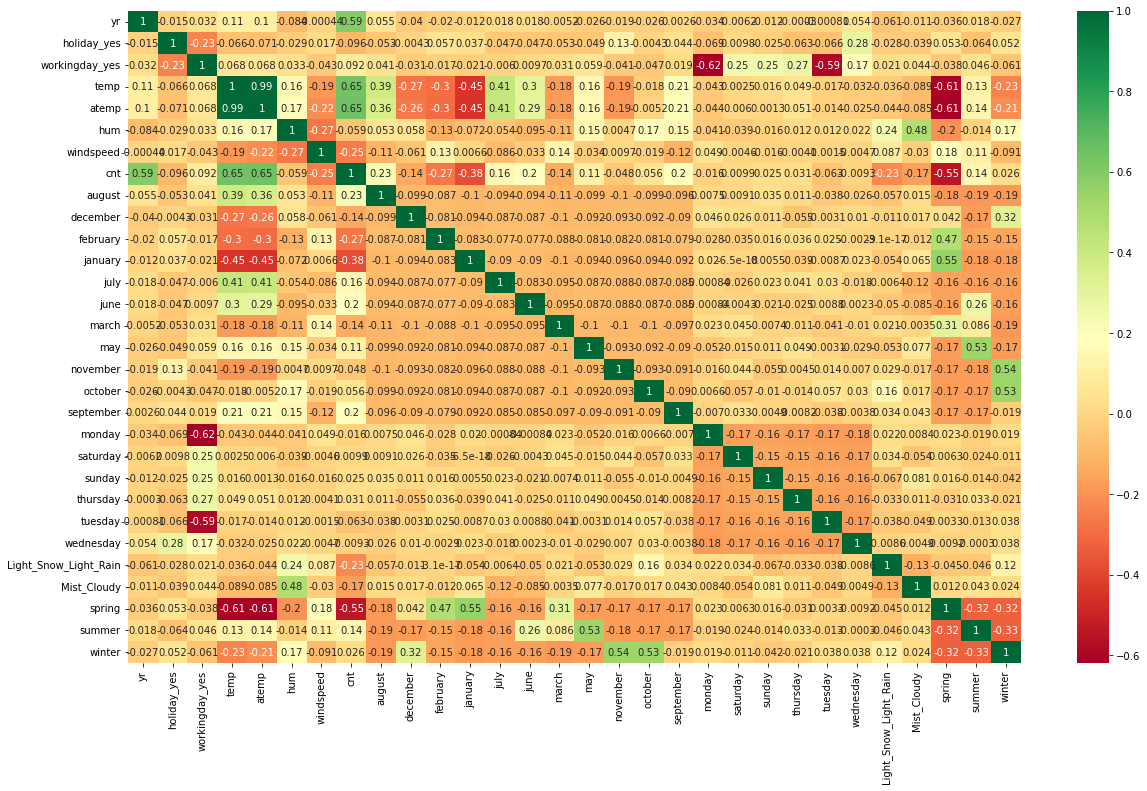

In [29]:
plt.figure(figsize = (20, 12))
sns.heatmap(bikesharing_train_df.corr(), annot = True, cmap="RdYlGn")
plt.show()

We can make a note that:

1. atemp and temp are highly co-related which is also logical since they are feels like temp and temp
2. Demand looks to be quite dependent on **temp**
3. Demand also looks to be inversely affected by **spring season** as it has neagtive co-relation

### 4. Model Building

Since we have **29 dependent variables** with us we will using feature selection techiniques to fine grain towards final model.

We will be using hybrid approach of first eliminating some features with automated approach **Recursive Feature Elimination(RFE)** and verifying the business significance of the ones being dropped.

Then we will move on to manual feature elimination method known as **Backward Feature Elimination** since we already start with all features before RFE and now have subset which we want to fine tune further

#### Formulating the dependent and Independent variables dataframe (or what we say as X and y)

In [30]:
y_train = bikesharing_train_df.pop('cnt')
X_train = bikesharing_train_df

#### Feature Selection/Elimination using RFE

In [31]:
# We will first use RFE to select the first 15-most significant predictor variables.

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday_yes', True, 1),
 ('workingday_yes', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('august', True, 1),
 ('december', False, 14),
 ('february', False, 3),
 ('january', True, 1),
 ('july', False, 10),
 ('june', False, 6),
 ('march', False, 11),
 ('may', False, 4),
 ('november', False, 13),
 ('october', False, 2),
 ('september', True, 1),
 ('monday', True, 1),
 ('saturday', False, 12),
 ('sunday', False, 9),
 ('thursday', False, 7),
 ('tuesday', True, 1),
 ('wednesday', False, 8),
 ('Light_Snow_Light_Rain', True, 1),
 ('Mist_Cloudy', True, 1),
 ('spring', False, 15),
 ('summer', True, 1),
 ('winter', True, 1)]

In [33]:
print("Columns selected by RFE",X_train.columns[rfe.support_])
print("Columns eliminated by RFE",X_train.columns[~rfe.support_])

Columns selected by RFE Index(['yr', 'holiday_yes', 'workingday_yes', 'temp', 'hum', 'windspeed',
       'august', 'january', 'september', 'monday', 'tuesday',
       'Light_Snow_Light_Rain', 'Mist_Cloudy', 'summer', 'winter'],
      dtype='object')
Columns eliminated by RFE Index(['atemp', 'december', 'february', 'july', 'june', 'march', 'may',
       'november', 'october', 'saturday', 'sunday', 'thursday', 'wednesday',
       'spring'],
      dtype='object')


In [34]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

Building first model based on this list and then fine tune if required using manual feature elimination method as mentioned above

#### Linear Regression Model-1

Since we are using multiple features hence its evident that we are doing Multiple Linear Regression

In [35]:
# as we will be building model after feature elimination hence making a function for same
def buildLRModel(X_train, y_train):
    X_train_lrm = sm.add_constant(X_train)  # adding a constant to the provided set
    lr_model = sm.OLS(y_train, X_train_lrm).fit()    # Fitting the OLS for X_train_lrm & y_train to get model
    print(lr_model.summary())
    return lr_model

# since we will need VIF to cross-reference our models results 
# creating a function for reuse
def calculateVIF(dataframe):
    vif = pd.DataFrame()                    # declaring the variable vif as a dataframe
    vif['Features'] = dataframe.columns     # adding columns names so we can see which VIF value corresponds to what feature
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]   # calculated VIF is added to a new column called VIF
    vif['VIF'] = round(vif['VIF'], 2)                        # rounding off values to 2nd decimal 
    vif = vif.sort_values(by = "VIF", ascending = False)     # sorting such that highest VIF is on top
    print(vif)

In [36]:
lrm_1 = buildLRModel(X_train_rfe,y_train)
calculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.01e-191
Time:                        22:18:15   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

#### Linear Regression Model-2

Dropping **holiday/holiday_yes** column as it has very high p-value signifying failure to reject null hypothesis

In [37]:
X_train_rfe_2 = X_train_rfe.drop(['holiday_yes'], axis=1)
lrm_2 = buildLRModel(X_train_rfe_2,y_train)
calculateVIF(X_train_rfe_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.01e-191
Time:                        22:18:15   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

#### Linear Regression Model-3

Dropping **hum** column as it very high VIF

In [38]:
X_train_rfe_3 = X_train_rfe_2.drop(['hum'], axis=1)
lrm_3 = buildLRModel(X_train_rfe_3,y_train)
calculateVIF(X_train_rfe_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          6.55e-189
Time:                        22:18:15   Log-Likelihood:                 508.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     496   BIC:                            -930.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.06

#### Linear Regression Model-4

Dropping **workingday_yes** column as it very high VIF

In [39]:
X_train_rfe_4 = X_train_rfe_3.drop(['workingday_yes'], axis=1)
lrm_4 = buildLRModel(X_train_rfe_4,y_train)
calculateVIF(X_train_rfe_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.65e-187
Time:                        22:18:15   Log-Likelihood:                 501.07
No. Observations:                 510   AIC:                            -976.1
Df Residuals:                     497   BIC:                            -921.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

#### Linear Regression Model-5

Dropping **monday** column as it has very high p-value signifying failure to reject null hypothesis

In [40]:
X_train_rfe_5 = X_train_rfe_4.drop(['monday'], axis=1)
lrm_5 = buildLRModel(X_train_rfe_5,y_train)
calculateVIF(X_train_rfe_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.27e-187
Time:                        22:18:15   Log-Likelihood:                 500.22
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     498   BIC:                            -925.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

#### Linear Regression Model-6

Dropping **temp** column as it has VIF > 5

In [41]:
X_train_rfe_6 = X_train_rfe_5.drop(['temp'], axis=1)
lrm_6 = buildLRModel(X_train_rfe_6,y_train)
calculateVIF(X_train_rfe_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     117.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.25e-124
Time:                        22:18:15   Log-Likelihood:                 347.43
No. Observations:                 510   AIC:                            -672.9
Df Residuals:                     499   BIC:                            -626.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.46

But this can't be good as R2 dropped a lot suddenly means quite some variance was defined by one variable. Let try the alternative approach of eliminating **january** even though it has p value in acceptable region

In [42]:
X_train_rfe_7 = X_train_rfe_5.drop(['january'], axis=1)
lrm_7 = buildLRModel(X_train_rfe_7,y_train)
calculateVIF(X_train_rfe_7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.59e-187
Time:                        22:18:15   Log-Likelihood:                 497.12
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     499   BIC:                            -925.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

We are able to successfully remove 5 features without much drop in R2 and Adjusted R2 hence we will take this model for evaluation.  

Almost all p-values ~ 0  
Prob (F-statistic) ~ 0 means it explains the overall fit is good


In [43]:
lrm_7.params

const                    0.133020
yr                       0.232789
temp                     0.522019
windspeed               -0.151702
august                   0.053085
september                0.110811
tuesday                 -0.044887
Light_Snow_Light_Rain   -0.282214
Mist_Cloudy             -0.081256
summer                   0.102096
winter                   0.137290
dtype: float64

### 5. Model Evaluation

#### Residual Analysis 

To verify if the model does not voilate the assumptions of error terms for Linear Rgeression

1. Normality
2. Homoscedacity
3. Independence of error terms

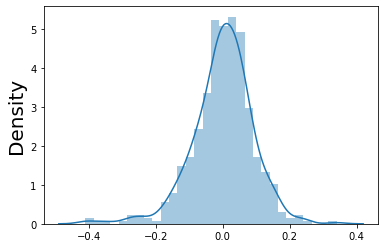

In [44]:
y_train_pred = lrm_7.predict(sm.add_constant(X_train_rfe_7))
res = y_train - y_train_pred # computing the residuals
sns.distplot(res)
plt.show()

So residuals are normally distributed that check marks Normality aspect.

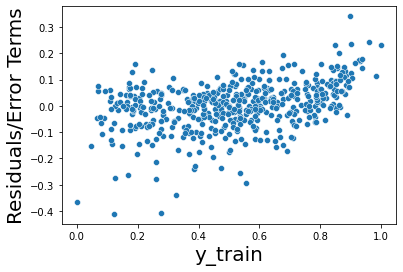

In [45]:
sns.scatterplot(x = y_train, y = res)
plt.xlabel('y_train')
plt.ylabel('Residuals/Error Terms')
plt.show()

We can observe the variance is not varying significantly

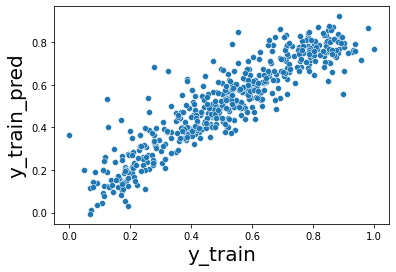

In [46]:
sns.scatterplot(x = y_train, y = y_train_pred)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.show()

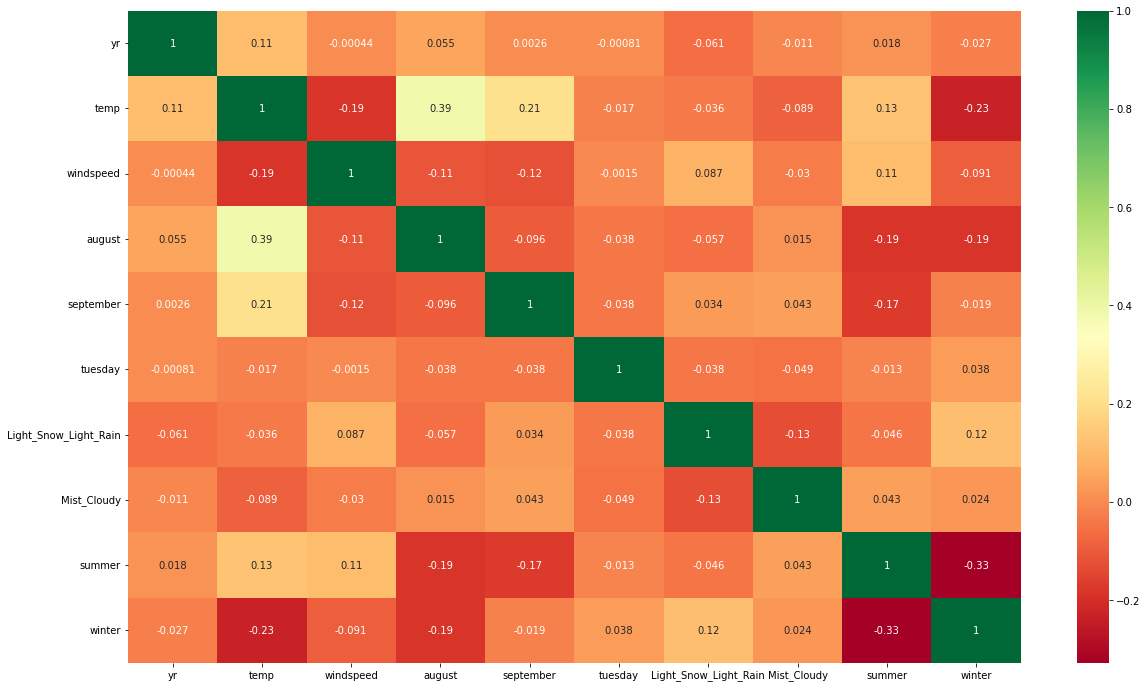

In [47]:
plt.figure(figsize=(20,12))
sns.heatmap(X_train_rfe_7.corr(),annot = True, cmap="RdYlGn")
plt.show()

There are no highly co-related features hence no multicolinearity

In [48]:
X_train_rfe_7.head()

,yr,temp,windspeed,august,september,tuesday,Light_Snow_Light_Rain,Mist_Cloudy,summer,winter
576,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0.442393,0.255342,0,0,0,0,1,0,0
728,1,0.245101,0.663106,0,0,1,0,0,0,0
482,1,0.395666,0.188475,0,0,0,0,1,1,0
111,0,0.345824,0.380981,0,0,0,0,1,1,0


In [49]:
# Creating a list of numeric variables whose scaling needs to be done
num_vars_final = ['temp', 'windspeed', 'cnt']

# Transform the test set using the scaler used on train set
bikesharing_test_df[num_vars] = scaler.transform(bikesharing_test_df[num_vars])


y_test = bikesharing_test_df.pop('cnt')
X_test = bikesharing_test_df[X_train_rfe_7.columns]

In [50]:
y_test_pred = lrm_7.predict(sm.add_constant(X_test))

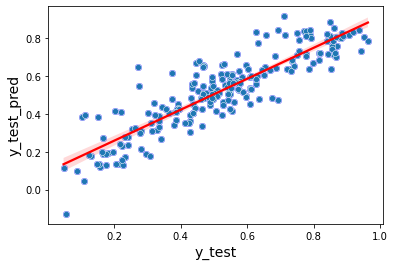

In [51]:
# Checking for predicted values of y_test against the actual values of y_test

sns.regplot(x=y_test, y=y_test_pred, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.scatterplot(y_test, y_test_pred)
plt.xlabel('y_test',fontsize=14)
plt.ylabel("y_test_pred",fontsize=14)
plt.show()

#### Evaluation of Model

In [52]:
# calculating the r-squared value for the test set

test_r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
test_r2

0.7939613577489646

In [53]:
# calculating the r-aquared value for the train set which anyway was seen in the summary statistics of our final model
train_r2 = r2_score(y_true = y_train, y_pred = y_train_pred)
train_r2

0.8341936887169201

In [54]:
# percentage difference between the r2_scores of the test and train set

percent_diff = round(((train_r2 - test_r2)/train_r2*100),1)
percent_diff

4.8

#### Model Equation

Using cofficient we will form the model equation

In [55]:
lrm_7.params.sort_values()

Light_Snow_Light_Rain   -0.282214
windspeed               -0.151702
Mist_Cloudy             -0.081256
tuesday                 -0.044887
august                   0.053085
summer                   0.102096
september                0.110811
const                    0.133020
winter                   0.137290
yr                       0.232789
temp                     0.522019
dtype: float64

In [56]:
equation = 'cnt = '
for index, value in lrm_7.params.items():
    if index == 'const':
        equation += str(value)
    else:
        equation += (" - ("+str(value)[1:] if str(value)[0] == "-" else " + ("+str(value) ) + "*"+index +")" 
print(equation)

cnt = 0.1330197408956671 + (0.23278871359714653*yr) + (0.5220187137557438*temp) - (0.15170203050068382*windspeed) + (0.05308510971625992*august) + (0.11081147315892523*september) - (0.044886767123307005*tuesday) - (0.28221426979630027*Light_Snow_Light_Rain) - (0.08125577454524632*Mist_Cloudy) + (0.10209625262417996*summer) + (0.13729042959858417*winter)


In [57]:
bikesharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Conclusion 

1. **Temperature** is a very big factor in driving demand. Since the temperature for given dataset varies between 2-35 and most of the time its under 30 hence it means that temperature drops or its chilly outside people prefer less ride while on a pleasant day(15-28) the demand rises.

2. **Year** as highlighted in Data understanding stage also, the demand increases gradually every year as word of mouth and operations expand.

3. In case of **Light Snow , Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds** the demand drops a lot which again is logical since its hard to drive bike in that kind of weather

4. Similarly on a **windy day** the bike is not preferred option
